In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import datetime
today = str(datetime.datetime.now().date()).replace("-","")
print("오늘 날짜 : " + today)

오늘 날짜 : 20210426


In [2]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

In [3]:
train = pd.read_csv('../data/train.csv')
test  = pd.read_csv('../data/test.csv')

train.drop(columns = "index" ,axis=1,inplace=True)
test .drop(columns = "index",axis=1,inplace=True)

train.drop('FLAG_MOBIL',axis=1,inplace=True)
test .drop('FLAG_MOBIL',axis=1,inplace=True)

In [4]:
train.head()`

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,NaN,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,Managers,2.0,-26.0,2.0


In [5]:
# "credit ~"+"+".join(train.columns)
independency_feature = set(train.columns).difference(set(["credit"]))
dependency_feature   = "credit"

In [6]:
train['occyp_type'] = train['occyp_type'].fillna('NAN')
test['occyp_type']  = test['occyp_type'] .fillna('NAN')
train.isnull().sum()

gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
dtype: int64

In [7]:
myModel = smf.ols(formula = dependency_feature + "~" + " + ".join(independency_feature), data=train)
result = myModel.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 credit   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     11.05
Date:                Sun, 25 Apr 2021   Prob (F-statistic):           6.00e-78
Time:                        12:45:14   Log-Likelihood:                -19291.
No. Observations:               18286   AIC:                         3.868e+04
Df Residuals:                   18239   BIC:                         3.904e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     0.6475      0.349      1.853      0.064      -0.037       1.332
edu_type[T.Higher education]                  0.4428      0.221      2.006      0.045       0.010       0.876
edu_type[T.Incomplete higher]                 0.4793      0.222      2.158      0.031       0.044       0.915
edu_type[T.Lower secondary]                   0.4815      0.229      2.104      0.035       0.033       0.930
edu_type[T.Secondary / secondary special]     0.4567      0.221      2.070      0.038       0.024       0.889
reality[T.Y]                                 -0.0089      0.011     -0.778      0.437      -0.031       0.014
occyp_type[T.Cleaning staff]                  0.0928      0.043      2.167      0.030       0.009       0.177
occyp_type[T.Cooking staff]                   0.0338      0.041      0.827      0.408      -0.046       0.114
occyp_type[T.Core staff]                      0.0177      0.027      0.649      0.516      -0.036       0.071
occyp_type[T.Drivers]                         0.0330      0.032      1.031      0.303      -0.030       0.096
occyp_type[T.HR staff]                        0.2394      0.092      2.608      0.009       0.060       0.419
occyp_type[T.High skill tech staff]           0.0030      0.032      0.094      0.925      -0.060       0.066
occyp_type[T.IT staff]                       -0.1254      0.112     -1.124      0.261      -0.344       0.093
occyp_type[T.Laborers]                        0.0150      0.027      0.550      0.582      -0.038       0.068
occyp_type[T.Low-skill Laborers]              0.0012      0.068      0.018      0.985      -0.131       0.134
occyp_type[T.Managers]                        0.0270      0.028      0.950      0.342      -0.029       0.083
occyp_type[T.Medicine staff]                  0.0811      0.034      2.368      0.018       0.014       0.148
occyp_type[T.Private service staff]           0.0028      0.051      0.056      0.956      -0.096       0.102
occyp_type[T.Realty agents]                   0.0654      0.091      0.717      0.473      -0.113       0.244
occyp_type[T.Sales staff]                     0.0485      0.028      1.755      0.079      -0.006       0.103
occyp_type[T.Secretaries]                     0.0163      0.075      0.218      0.828      -0.130       0.163
occyp_type[T.Security staff]                  0.1135      0.043      2.651      0.008       0.030       0.197
occyp_type[T.Waiters/barmen staff]           -0.0102      0.067     -0.151      0.880      -0.142       0.122
family_type[T.Married]                       -0.0004      0.019     -0.020      0.984      -0.038       0.037
family_type[T.Separated]                      0.0212      0.132      0.160      0.872      -0.238       0.281
fam

## 순서형/ 명목형 변수 변환




object_features = ["family_type", "house_type"]


In [8]:
object_features = ["family_type", "house_type", "income_type", "edu_type", "occyp_type"]

In [9]:
train_df = train.copy()
dummied_train = pd.get_dummies(train_df[object_features])
train_df = pd.concat([train_df,dummied_train],axis=1)
train_df = train_df.drop(columns = object_features)

In [10]:
dummied_test = pd.get_dummies(test[object_features])
test_df = pd.concat([test,dummied_test],axis=1)
test_df = test_df.drop(columns = object_features)

In [11]:
train_df.head()

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_NAN,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,F,N,N,0,202500.0,-13899,-4709,0,0,0,2.0,-6.0,1.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,F,N,Y,1,247500.0,-11380,-1540,0,0,1,3.0,-5.0,1.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,M,Y,Y,0,450000.0,-19087,-4434,0,1,0,2.0,-22.0,2.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,F,N,Y,0,202500.0,-15088,-2092,0,1,0,2.0,-37.0,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,F,Y,Y,0,157500.0,-15037,-2105,0,0,0,2.0,-26.0,2.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [12]:
test_df.head()

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_NAN,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,M,Y,N,0,112500.0,-21990,365243,0,1,0,2.0,-60.0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,F,N,Y,0,135000.0,-18964,-8671,0,1,0,2.0,-36.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,F,N,Y,0,69372.0,-15887,-217,1,1,0,2.0,-40.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,M,Y,N,0,112500.0,-19270,-2531,1,0,0,2.0,-41.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,F,Y,Y,0,225000.0,-17822,-9385,1,0,0,2.0,-8.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


#### 변환한 변수 제거

## 레이블 인코딩

In [13]:
def incoding_gender(index):
    if index == 'M' or index == 1:
        return 1
    else:
        return 0

def incoding_yes_no(index):
    if index == 'Y' or index == 1:
        return 1
    else:
        return 0

In [14]:
train_df['gender']  = train_df['gender'] .apply(incoding_gender)
train_df['reality'] = train_df['reality'].apply(incoding_yes_no)
train_df['car']     = train_df['car']    .apply(incoding_yes_no)

In [15]:
test_df['gender']  = test_df['gender'] .apply(incoding_gender)
test_df['car']     = test_df['car']    .apply(incoding_yes_no)
test_df['reality'] = test_df['reality'].apply(incoding_yes_no)

In [16]:
train_df.head()

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_NAN,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
0,0,0,0,0,202500.0,-13899,-4709,0,0,0,2.0,-6.0,1.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,1,247500.0,-11380,-1540,0,0,1,3.0,-5.0,1.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,450000.0,-19087,-4434,0,1,0,2.0,-22.0,2.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,202500.0,-15088,-2092,0,1,0,2.0,-37.0,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,157500.0,-15037,-2105,0,0,0,2.0,-26.0,2.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [17]:
train_df.loc[(train_df.DAYS_EMPLOYED)>0,'DAYS_EMPLOYED'] = 365
test_df .loc[(test_df .DAYS_EMPLOYED)>0,'DAYS_EMPLOYED'] = 365


train_df['DAYS_BIRTH']    = round(train_df['DAYS_BIRTH']    / -365)
train_df['DAYS_EMPLOYED'] = round(train_df['DAYS_EMPLOYED'] / -365)
train_df['begin_month']   = train_df['begin_month']   * -1

test_df['DAYS_BIRTH']    = round(test_df['DAYS_BIRTH']    / -365)
test_df['DAYS_EMPLOYED'] = round(test_df['DAYS_EMPLOYED'] / -365)
test_df['begin_month']   = test_df['begin_month']   * -1

In [18]:
train_df.tail()

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_NAN,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
26452,0,0,0,2,225000.0,33.0,5.0,0,0,0,4.0,2.0,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26453,0,0,1,1,180000.0,42.0,7.0,0,0,0,2.0,47.0,2.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
26454,0,1,0,0,292500.0,28.0,6.0,0,0,0,2.0,25.0,2.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26455,1,0,1,0,171000.0,28.0,0.0,0,0,0,1.0,59.0,2.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
26456,0,0,0,0,81000.0,54.0,3.0,0,0,0,2.0,9.0,2.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### 기초통계량 확인

In [19]:
train_df.describe()

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_NAN,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff
count,26457.000000,26457.000000,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.331103,0.379748,0.673924,0.428658,1.873065e+05,43.731186,5.865291,0.224742,0.294251,0.091280,2.196848,26.123294,1.519560,0.080243,0.687757,0.058170,0.132139,0.041690,0.004158,0.894017,0.030918,0.007181,0.016215,0.047511,0.234418,0.168160,0.081415,0.000265,0.515743,0.000869,0.270703,0.038553,0.009714,0.680160,0.034093,0.015232,0.017273,0.100011,0.059531,0.002343,0.039309,0.001550,0.170541,0.004800,0.081906,0.032657,0.308841,0.009185,0.002381,0.095967,0.003666,0.016026,0.004687
std,0.470619,0.485333,0.468784,0.747326,1.018784e+05,11.521771,6.662338,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283,0.271675,0.463417,0.234069,0.338648,0.199884,0.064347,0.307822,0.173099,0.084440,0.126304,0.212733,0.423643,0.374015,0.273477,0.016264,0.499762,0.029472,0.444332,0.192531,0.098081,0.466423,0.181472,0.122478,0.130290,0.300021,0.236620,0.048353,0.194333,0.039336,0.376114,0.069119,0.274227,0.177740,0.462024,0.095398,0.048741,0.294552,0.060440,0.125578,0.068301
min,0.000000,0.000000,0.000000,0.000000,2.700000e+04,21.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.215000e+05,34.000000,1.000000,0.000000,0.000000,0.000000,2.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,1.575000e+05,43.000000,4.000000,0.000000,0.000000,0.000000,2.000000,24.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000

### 분포 및 이상치 확인
- 연속형 변수 대상으로

In [20]:
max(train_df["family_size"])

20.0

In [21]:
linear_features = ['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size','begin_month']

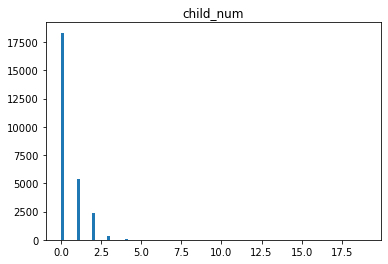

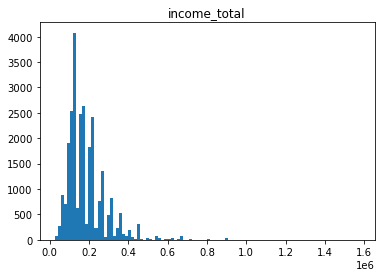

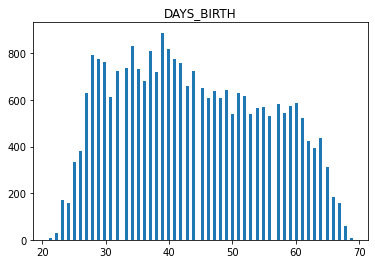

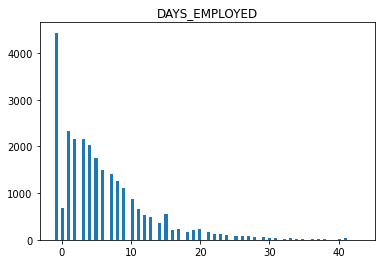

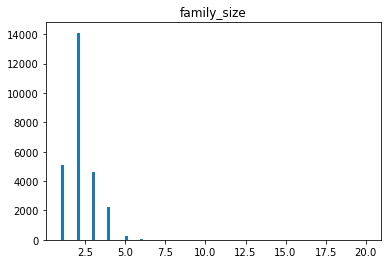

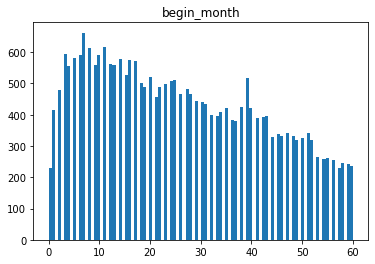

In [22]:
for linear_feature in linear_features :
    plt.title(linear_feature)
    plt.hist(train_df[linear_feature],bins=100)
    plt.show()

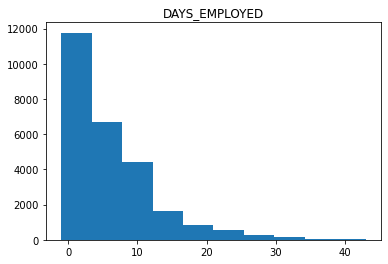

In [23]:
plt.title('DAYS_EMPLOYED')
plt.hist(train_df['DAYS_EMPLOYED'])
plt.show()

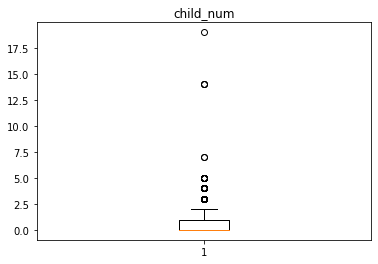

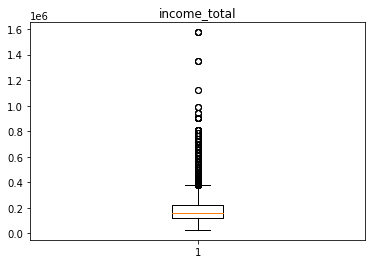

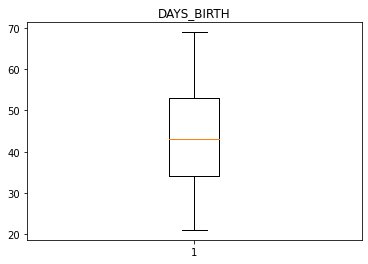

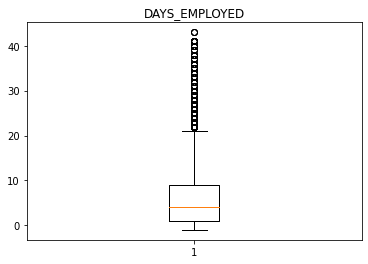

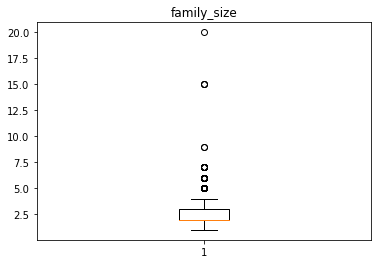

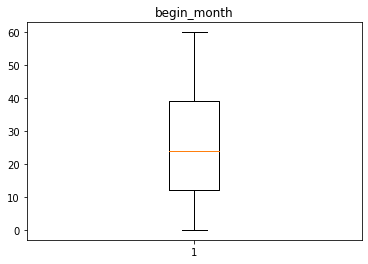

In [24]:
for linear_feature in linear_features:
    plt.title(linear_feature)
    plt.boxplot(train_df[linear_feature])
    plt.show()

#### 불균형 데이터
- Child_num, income_total, DAYS_EMPLOYED, family_size 네 개의 변수가 불균형 데이터임
- 모두 오른쪽 꼬리 형태를 취하고 있으므로 해당 처리 필요 --> 우선 로그변환 적용 후 확인

#### 이상치 데이터
- Child_num, income_total, family_size  모두 이상치 데이터 존재
- 분포 변환 후 다시 확인

## 변수 issue

In [25]:
print(train_df['DAYS_EMPLOYED'].value_counts())

-1.0     4438
 1.0     2322
 2.0     2168
 3.0     2159
 4.0     2023
 5.0     1761
 6.0     1486
 7.0     1404
 8.0     1253
 9.0     1118
 10.0     877
 0.0      680
 11.0     665
 15.0     556
 12.0     532
 13.0     492
 14.0     355
 20.0     237
 17.0     225
 16.0     207
 19.0     203
 18.0     171
 21.0     158
 22.0     129
 23.0     115
 24.0      96
 27.0      87
 25.0      84
 26.0      84
 28.0      67
 29.0      55
 33.0      42
 30.0      42
 31.0      29
 41.0      28
 34.0      25
 32.0      21
 35.0      20
 36.0      11
 40.0       9
 38.0       8
 37.0       7
 39.0       5
 43.0       3
Name: DAYS_EMPLOYED, dtype: int64


##### 특정숫자의 값이 이상하게 많고 기존 다른값과 차이가 심함
- 이상치 0으로 대체

In [26]:
train_df.loc[(train_df.DAYS_EMPLOYED)>=35,'DAYS_EMPLOYED'] = 35
test_df .loc[(test_df .DAYS_EMPLOYED)>=35,'DAYS_EMPLOYED'] = 35

### 3) 자식 수 최대값 이상치

In [27]:
train_df['child_num'].value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

비정상적으로 많은 자식 수 존재<br>
3 이상을 3로 대체

In [28]:
train_df.loc[train_df['child_num'] > 2,'child_num'] = 3
test_df .loc[test_df['child_num']  > 2,'child_num'] = 3
train_df['child_num'].value_counts()

0    18340
1     5386
2     2362
3      369
Name: child_num, dtype: int64

### 4) 로그 변환

In [29]:
dist_check_list = ['income_total', 'family_size']

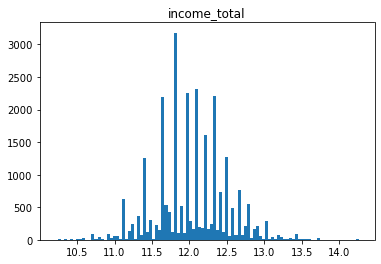

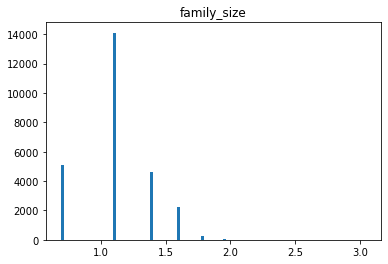

In [30]:
for dist_check in dist_check_list:
    np.log1p(train_df[dist_check])
    
    plt.title(dist_check)
    plt.hist(np.log1p(train_df[dist_check]),bins=100)
    plt.show()

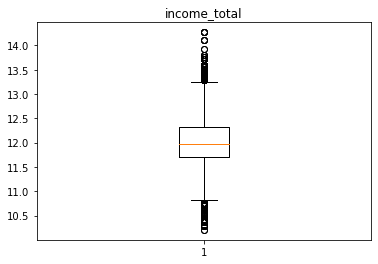

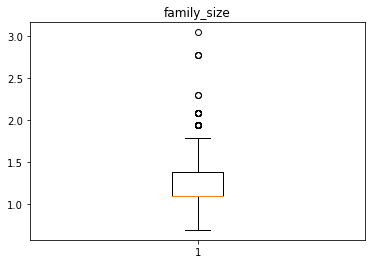

In [31]:
for dist_check in dist_check_list:
    np.log1p(train_df[dist_check])
    
    plt.title(dist_check)
    plt.boxplot(np.log1p(train_df[dist_check]))
    plt.show()

income 변수의 경우는 정규 분포로 변환 가능하였지만 Day_employed 변수와 family_size 변수는 큰 차이를 보이지 않음

#### 일단 해당 변수들에 대해 로그변환한 변수 올려놓음

In [32]:
log_list = ['income_total']

In [33]:
for log_column in log_list:
    train_df['ln_%s'%log_column] = np.log1p(train_df[log_column])
    test_df['ln_%s'%log_column] = np.log1p(test_df[log_column])

In [34]:
train_df

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_NAN,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,ln_income_total
0,0,0,0,0,202500.0,38.0,13.0,0,0,0,2.0,6.0,1.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12.218500
1,0,0,1,1,247500.0,31.0,4.0,0,0,1,3.0,5.0,1.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12.419170
2,1,1,1,0,450000.0,52.0,12.0,0,1,0,2.0,22.0,2.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,13.017005
3,0,0,1,0,202500.0,41.0,6.0,0,1,0,2.0,37.0,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,12.218500
4,0,1,1,0,157500.0,41.0,6.0,0,0,0,2.0,26.0,2.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,11.967187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,2,225000.0,33.0,5.0,0,0,0,4.0,2.0,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.323860
26453,0,0,1,1,180000.0,42.0,7.0,0,0,0,2.0,47.0,2.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,12.100718
26454,0,1,0,0,292500.0,28.0,6.0,0,0,0,2.0,25.0,2.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.586223
26455,1,0,1,0,171000.0,28.0,0.0,0,0,0,1.0,59.0,2.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,12.049425


In [35]:
test

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month
0,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,0,1,0,NAN,2.0,-60.0
1,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,0,1,0,Core staff,2.0,-36.0
2,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,0,Laborers,2.0,-40.0
3,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,0,0,Drivers,2.0,-41.0
4,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,0,0,Managers,2.0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,F,Y,Y,0,202500.0,Working,Incomplete higher,Married,House / apartment,-18593,-5434,1,1,0,Accountants,2.0,-19.0
9996,M,Y,Y,0,202500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886,-1315,1,0,0,Laborers,2.0,-34.0
9997,F,N,Y,0,292500.0,Working,Secondary / secondary special,Married,House / apartment,-21016,-14018,0,0,0,Medicine staff,2.0,-55.0
9998,F,Y,N,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-16541,-1085,0,1,0,NAN,2.0,-33.0


{'Commercial associate', 'Pensioner', 'State servant', 'Student', 'Working'}